# Lab: Poverty and Inequality

The idea of measuring Poverty and Inequality using the case study on "The Statistics of Poverty and Inequality" [@rouncefield_statistics_1995]. The questions that Mary Rouncefield asked her students were the following:

1. Is the world's wealth distributed evenly?
    What countries are outliers?
2. Do people living in different countries have similar life expectancies?
3. Do men and women have similar life expectancies?
    What is the average difference?
    What is the minimum difference?
    What is the maximum difference?
    In which countries do these occur?
    What are possible explanations for these differences?
4. Are birth rates related to death rates?
5. How quickly are populations growing?

By looking into 6 variables, you can investigate some major inequalites across the globe.  

## Source

In this lab, we will be using [World Development Indicators dataset](https://databank.worldbank.org/source/world-development-indicators#) from worldbank, which contains the following features: 																							

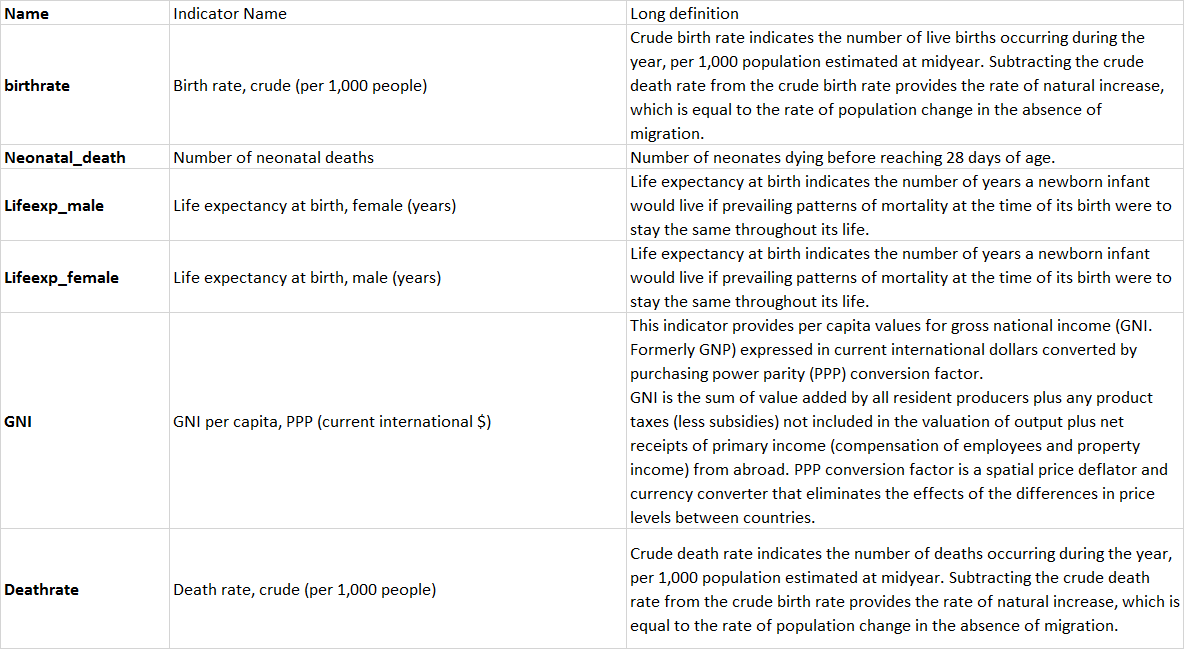



## Reading the dataset


In [1]:
import pandas as pd
df = pd.read_excel('data/WDI_countries_v2.xlsx', sheet_name='Data4')

Let's have a look at our dataset

In [2]:
df.head()

,Country Code,birthrate,Deathrate,GNI,Lifeexp_female,Lifeexp_male,Neonatal_death
0,AFG,32.487,6.423,2260.0,66.026,63.047,44503.0
1,ALB,11.780,7.898,13820.0,80.167,76.816,243.0
2,DZA,24.282,4.716,11450.0,77.938,75.494,16407.0
3,AND,7.200,4.400,NaN,NaN,NaN,1.0
4,AGO,40.729,8.190,6550.0,63.666,58.064,35489.0


### Missing values
Let's check if we have any missing data

In [3]:
df.info()
df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Code    216 non-null    object 
 1   birthrate       205 non-null    float64
 2   Deathrate       205 non-null    float64
 3   GNI             187 non-null    float64
 4   Lifeexp_female  198 non-null    float64
 5   Lifeexp_male    198 non-null    float64
 6   Neonatal_death  193 non-null    float64
dtypes: float64(6), object(1)
memory usage: 11.9+ KB


Country Code       0
birthrate         11
Deathrate         11
GNI               29
Lifeexp_female    18
Lifeexp_male      18
Neonatal_death    23
dtype: int64

In [4]:
df.boxplot(column=['birthrate', 'Deathrate'])

<Axes: >

<Figure size 1650x1050 with 1 Axes>

In [5]:
df.boxplot(column=['Lifeexp_female', 'Lifeexp_male'])

<Axes: >

<Figure size 1650x1050 with 1 Axes>

In [6]:
df.boxplot(column=['GNI'])

<Axes: >

<Figure size 1650x1050 with 1 Axes>

In [7]:
#This is code for standarization  
from sklearn import preprocessing
import numpy as np
import seaborn as sns

#Get column names first
#names = df.columns
df_stand = df[['birthrate', 'Deathrate', 'GNI', 'Lifeexp_female', 'Lifeexp_male', 'Neonatal_death']]
names = df_stand.columns
#Create the Scaler object
scaler = preprocessing.StandardScaler()
#Fit your data on the scaler object
df2 = scaler.fit_transform(df_stand)
df2 = pd.DataFrame(df2, columns=names)
df2.tail()

ax = sns.boxplot(data=df2, orient="h")

<Figure size 1650x1050 with 1 Axes>

In [8]:
df.describe()

,birthrate,Deathrate,GNI,Lifeexp_female,Lifeexp_male,Neonatal_death
count,205.000000,205.000000,187.000000,198.000000,198.000000,193.000000
mean,19.637580,7.573941,20630.427807,75.193288,70.323854,12948.031088
std,9.839573,2.636414,21044.240160,7.870933,7.419214,48782.770706
min,5.900000,1.202000,780.000000,54.991000,50.582000,0.000000
25%,10.900000,5.800000,5090.000000,69.497250,65.533500,163.000000
50%,17.545000,7.163000,13280.000000,77.193000,71.140500,1288.000000
75%,27.100000,9.100000,28360.000000,80.776500,76.047500,7316.000000
max,46.079000,15.400000,123290.000000,87.700000,82.300000,546427.000000


In [9]:
df[['birthrate']].plot(kind='hist', ec='black')

<Axes: ylabel='Frequency'>

<Figure size 1650x1050 with 1 Axes>

In [10]:
import seaborn as sns
sns.pairplot(data = df.iloc[:,1:])

<Figure size 4500x4500 with 42 Axes>

In [11]:
df.plot(x = 'birthrate', y = 'Deathrate', kind='scatter')

<Axes: xlabel='birthrate', ylabel='Deathrate'>

<Figure size 1650x1050 with 1 Axes>

In [12]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

corrMatrix = df.corr(numeric_only=True).round(1)  #I added here ".round(1)" so that's easier to read given number of variables
sn.heatmap(corrMatrix, annot=True)
plt.show()

<Figure size 1650x1050 with 2 Axes>

## How quickly are populations growing?

This question can be investigated by calculating birth rate minus death rate. 
Results range from -?? (a decreasing population) to +?? (an increasing population). 
The mean is around ??, but what does it signify? 

In [13]:
df['pop'] = df['birthrate'] - df['Deathrate']
df.head()

,Country Code,birthrate,Deathrate,GNI,Lifeexp_female,Lifeexp_male,Neonatal_death,pop
0,AFG,32.487,6.423,2260.0,66.026,63.047,44503.0,26.064
1,ALB,11.780,7.898,13820.0,80.167,76.816,243.0,3.882
2,DZA,24.282,4.716,11450.0,77.938,75.494,16407.0,19.566
3,AND,7.200,4.400,NaN,NaN,NaN,1.0,2.800
4,AGO,40.729,8.190,6550.0,63.666,58.064,35489.0,32.539


In [14]:
df.boxplot(column=['pop'])

<Axes: >

<Figure size 1650x1050 with 1 Axes>